In [3]:
import numpy as np
from sys import getsizeof
import matplotlib.pyplot as plt
from matplotlib import cm

# built to match the bit breakup in numpy
def power_polynomial_base(base, num_bases=8):
    return np.array([base**i for i in range(num_bases)])

def binary_to_n_polynomial_powers(bin_num, n_powers):
    return np.array([binary_to_polynomial_power(bin_num, i+2) for i in range(n_powers)])

def binary_to_polynomial_power(bin_num, power):
    return bits_to_polynomial_power(val_in_reverse_base_m(bin_num, 2), power)

def val_in_reverse_base_m(n, base):
    return np.flip(value_to_array_in_base(n, range(base)))

def value_to_array_in_base(n, base): 
    if n == 0: return base[0]
    b = len(base)
    digits = []
    while n > 0:
        digits = [base[n % b]] + digits
        n  = n // b
    return np.array(digits)

def bits_to_polynomial_power(bits_array, power):
    return np.dot(bits_array, power_polynomial_base(power, num_bases=np.size(bits_array)))

def prime_filter(a):
    return np.array([n for n in a if is_prime(n)])

def prime_filter_with_indices(a):
    return np.array([(i, n) for i, n in enumerate(a) if is_prime(n)])

def coeff_projection_to_base_n(array, base):
    return np.array([binary_to_polynomial_power(n, base) for n in array])

def is_prime(n):
    if (n <= 1) :
        return False
    if (n <= 3) :
        return True
    if (n % 2 == 0 or n % 3 == 0) :
        return False
    i = 5
    while(i * i <= n) :
        if (n % i == 0 or n % (i + 2) == 0):
            return False
        i = i + 6
    return True

In [4]:
# CONSTRUCT FROM INTEGERS UP TO START_MAX
start_max = 64
indices = np.linspace(0, start_max, start_max+1, dtype=np.int64)

primes = prime_filter(indices)
num_primes = len(primes)
integers = np.linspace(1, num_primes, num_primes+1, dtype=np.int64)

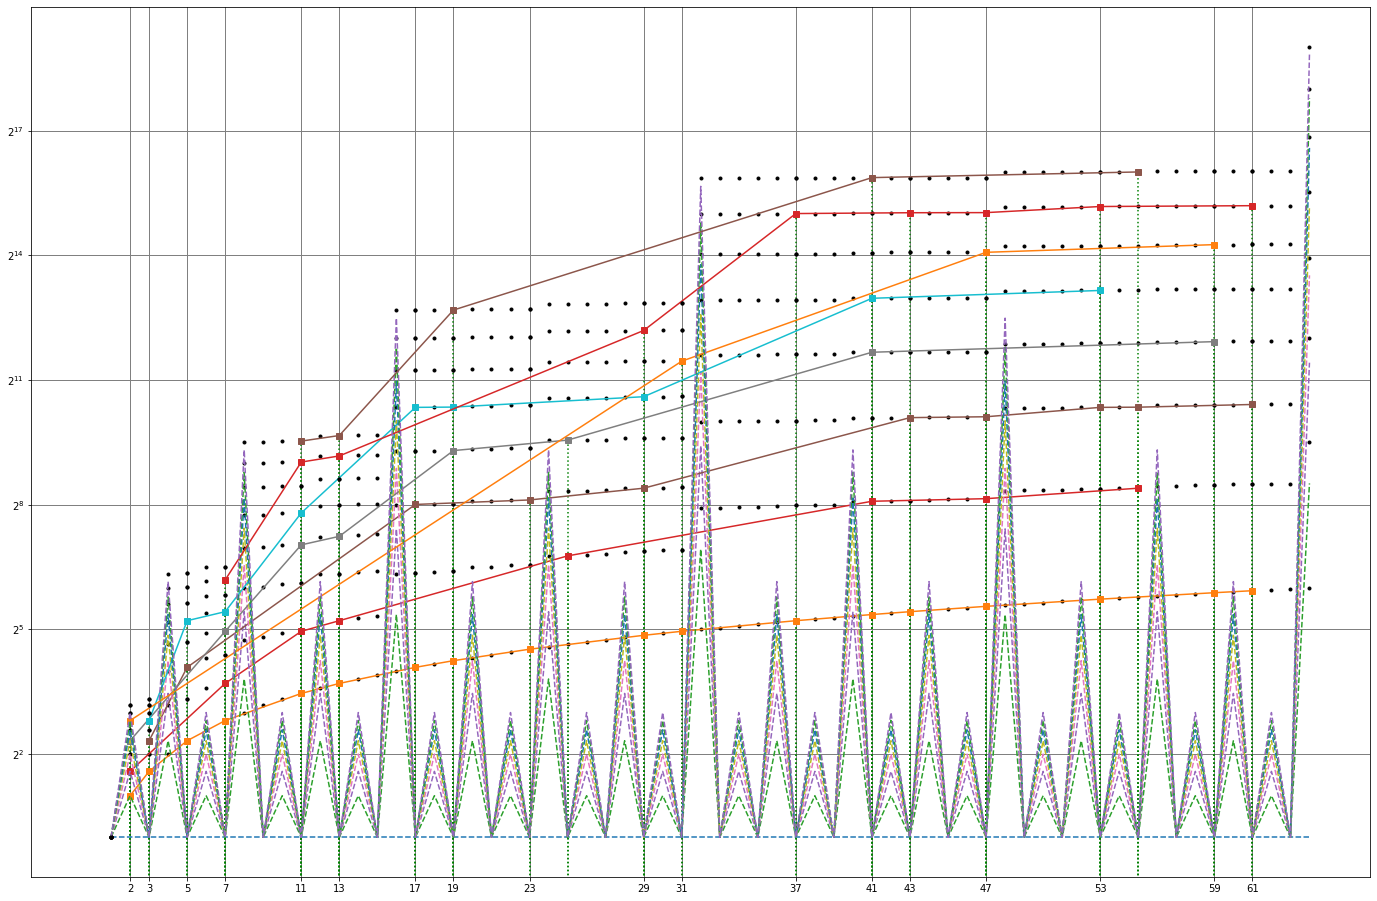

In [5]:


fig = plt.figure(figsize=(24,16))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log', basey=2)
ax.set_xticks(primes, minor=False)


ax.grid(color='gray', linestyle='-', linewidth=1)
for i in range(8):
    current_projection = coeff_projection_to_base_n(indices, i+2)
    plt.plot(indices[1:], np.diff(current_projection), '--')
    plt.plot(indices, current_projection, '.k')
    plt.plot(primes, coeff_projection_to_base_n(primes, i+2), '.k')
    indexed_primes = prime_filter_with_indices(current_projection) # extract this and write it down... no need to recalculate a million billion times.
    plt.vlines([row[0] for row in indexed_primes], 0, [row[1] for row in indexed_primes], linestyles ="dotted", colors ="g")
    plt.plot([row[0] for row in indexed_primes], [row[1] for row in indexed_primes], '-s')

plt.show()